In [1]:
import pandas as pd
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer

## Gender

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      8694
         1.0       0.85      0.79      0.82      1727

    accuracy                           0.94     10421
   macro avg       0.90      0.88      0.89     10421
weighted avg       0.94      0.94      0.94     10421


--- ROC Curve and AUC Score ---
AUC: 0.8804


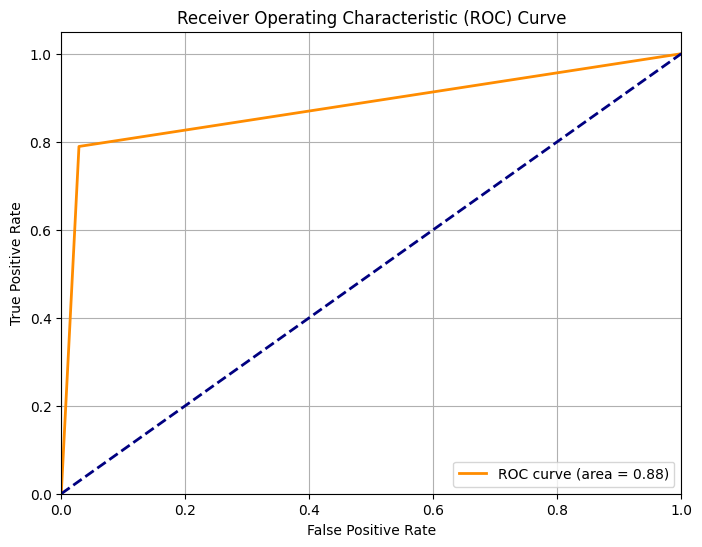

ROC curve plot saved as roc_curve.png

--- Confusion Matrix ---
[[8446  248]
 [ 364 1363]]


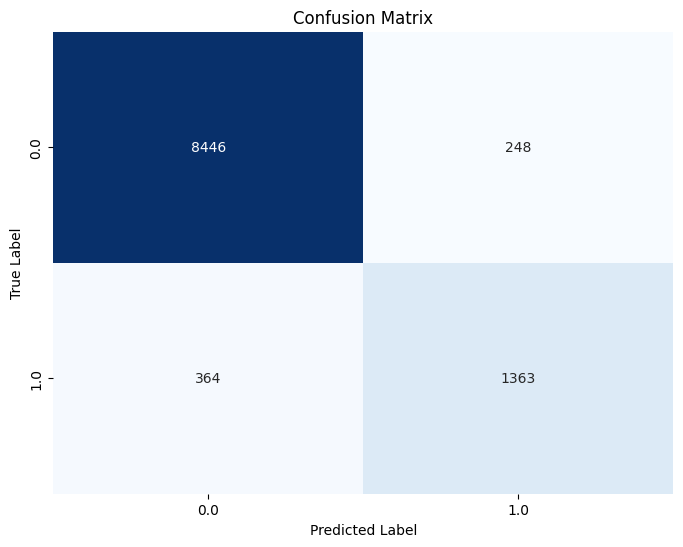

In [2]:
task = 'gender'
result = pd.read_csv(f'../../predictions/val/{task}_val.csv')
y_true = result['y_true'].tolist()
y_pred = result['y_pred'].tolist()

print("--- Classification Report ---")
report = classification_report(y_true, y_pred)
print(report)

print("\n--- ROC Curve and AUC Score ---")
# Calculate ROC curve and AUC
# Note: roc_curve typically expects probability scores for the positive class.
# If y_pred contains hard labels (0 or 1), it will still work,
# but the curve might look staircase-like.
# For a smoother curve, use prediction probabilities if available.
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
# plt.savefig('roc_curve.png')
plt.show()
print("ROC curve plot saved as roc_curve.png")

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

## Hand

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8428
         1.0       1.00      0.99      0.99      1993

    accuracy                           1.00     10421
   macro avg       1.00      1.00      1.00     10421
weighted avg       1.00      1.00      1.00     10421


--- ROC Curve and AUC Score ---
AUC: 0.9955


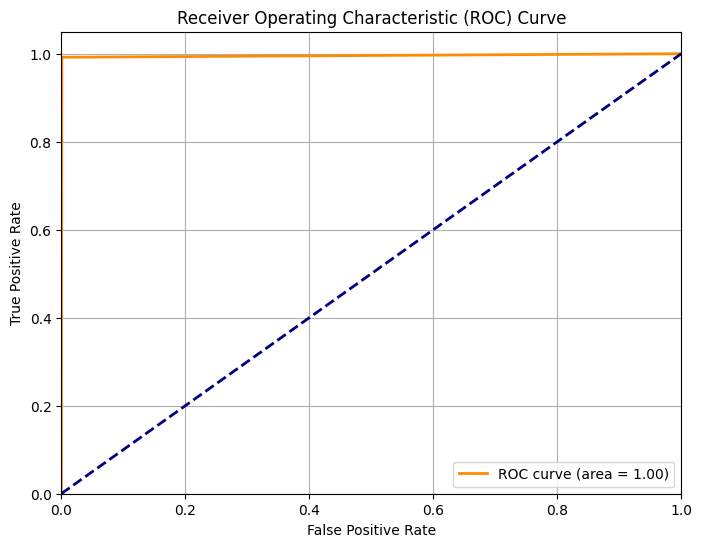

ROC curve plot saved as roc_curve.png

--- Confusion Matrix ---
[[8420    8]
 [  16 1977]]


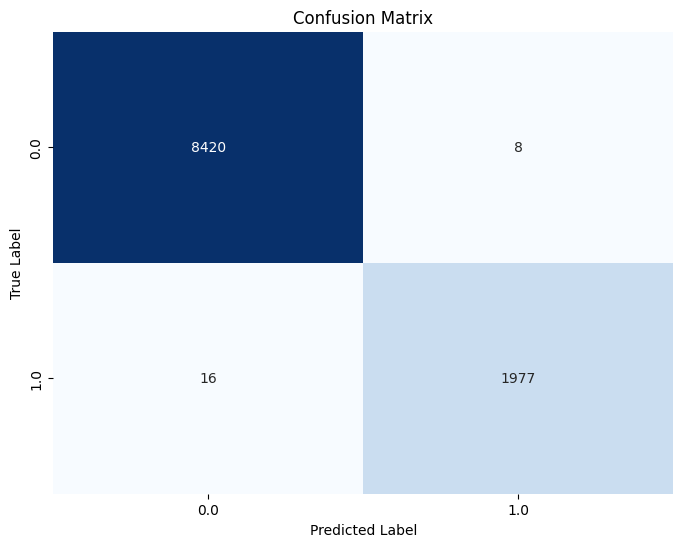

In [3]:
task = 'hand'
result = pd.read_csv(f'../../predictions/val/{task}_val.csv')
y_true = result['y_true'].tolist()
y_pred = result['y_pred'].tolist()

print("--- Classification Report ---")
report = classification_report(y_true, y_pred)
print(report)

print("\n--- ROC Curve and AUC Score ---")
# Calculate ROC curve and AUC
# Note: roc_curve typically expects probability scores for the positive class.
# If y_pred contains hard labels (0 or 1), it will still work,
# but the curve might look staircase-like.
# For a smoother curve, use prediction probabilities if available.
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
# plt.savefig('roc_curve.png')
plt.show()
print("ROC curve plot saved as roc_curve.png")

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

## Year

In [4]:
task = 'year'
result = pd.read_csv(f'../../predictions/val/{task}_val.csv')
list_of_probabilities = result['y_pred'].apply(ast.literal_eval)
result['prediction'] = list_of_probabilities.apply(lambda prob_list: np.argmax(prob_list))
prob_df = pd.DataFrame(
    list_of_probabilities.to_list(),
    columns=['prob1', 'prob2', 'prob3'], # Assuming there are always 4 probabilities
    index=result.index  
)
result = pd.concat([result, prob_df], axis=1)
result

,y_true,y_pred,prediction,prob1,prob2,prob3
0,0.0,"[0.9977, 0.001, 0.0013]",0,0.9977,0.0010,0.0013
1,1.0,"[0.0002, 0.9997, 0.0001]",1,0.0002,0.9997,0.0001
2,1.0,"[0.0, 1.0, 0.0]",1,0.0000,1.0000,0.0000
3,1.0,"[0.0, 0.9996, 0.0004]",1,0.0000,0.9996,0.0004
4,0.0,"[0.0, 0.0645, 0.9355]",2,0.0000,0.0645,0.9355
...,...,...,...,...,...,...
10416,2.0,"[0.0, 0.0, 1.0]",2,0.0000,0.0000,1.0000
10417,1.0,"[0.0001, 0.0049, 0.995]",2,0.0001,0.0049,0.9950
10418,2.0,"[0.0001, 0.8823, 0.1176]",1,0.0001,0.8823,0.1176
10419,0.0,"[1.0, 0.0, 0.0]",0,1.0000,0.0000,0.0000


In [5]:
y_true = result['y_true'].tolist()
y_pred = result['prediction'].tolist()
prob_1 = result['prob1'].tolist()
prob_2 = result['prob2'].tolist()
prob_3 = result['prob3'].tolist()

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83      2061
         1.0       0.88      0.91      0.90      4618
         2.0       0.86      0.91      0.89      3742

    accuracy                           0.88     10421
   macro avg       0.89      0.86      0.87     10421
weighted avg       0.88      0.88      0.88     10421


--- Confusion Matrix ---
[[1556  287  218]
 [  91 4201  326]
 [  49  279 3414]]


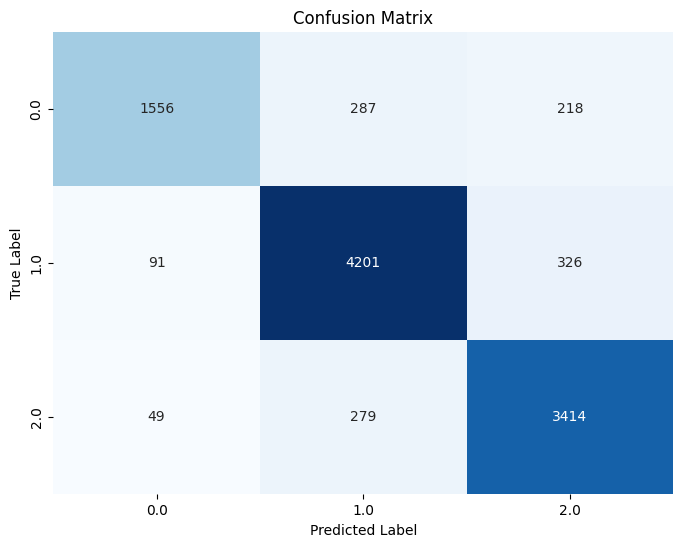

In [6]:
print("--- Classification Report ---")
report = classification_report(y_true, y_pred)
print(report)

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

Micro-averaged One-vs-Rest ROC AUC: 0.9705

Individual Class OvR ROC AUCs:
   Class 0 ROC AUC (OvR): 0.9682
   Class 1 ROC AUC (OvR): 0.9670
   Class 2 ROC AUC (OvR): 0.9726

Macro-averaged One-vs-Rest ROC AUC: 0.9692

--- Plotting ROC Curves ---


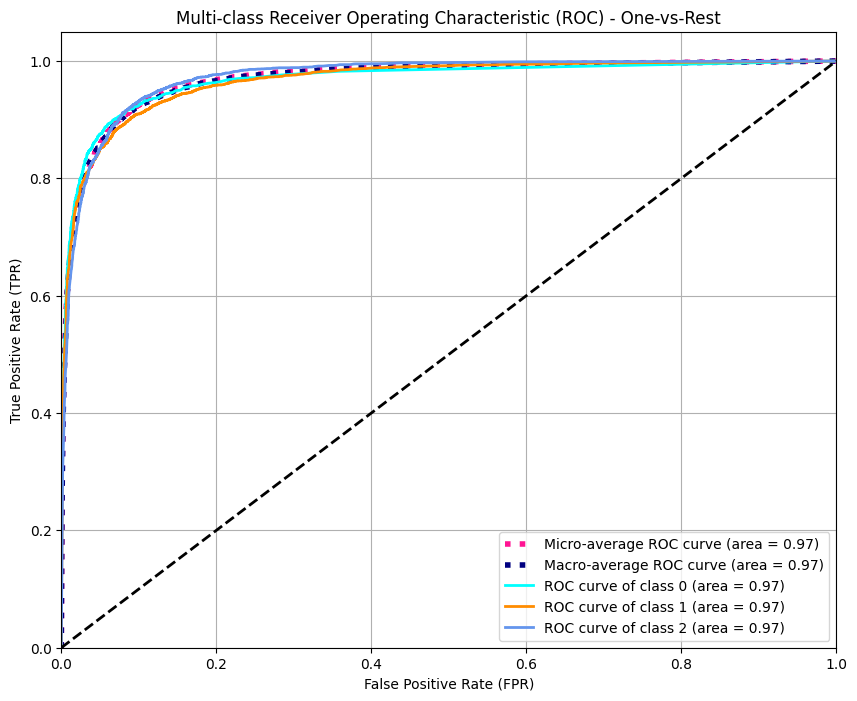

ROC curve plot displayed.


In [7]:
y_score = np.array([prob_1, prob_2, prob_3]).T
n_classes = y_score.shape[1] # Dynamically determine number of classes from y_score columns
classes = np.arange(n_classes) # Assumes classes are 0, 1, ..., n_classes-1

# Binarize the true labels for One-vs-Rest calculation
# This converts y_true from a single column of labels to a one-hot encoded matrix
# where each column represents a class.
from sklearn.preprocessing import label_binarize # Use label_binarize for more robust handling
y_true_binarized = label_binarize(y_true, classes=classes)

# Handle the case where LabelBinarizer (or label_binarize) might return a single column for binary cases
# when n_classes is > 1 but effectively binary (e.g. classes=[0,1] within a 3-class setup)
# For OvR, we generally expect one column per class in y_true_binarized.
if y_true_binarized.shape[1] == 1 and n_classes > 1:
    # If y_true only contains two unique values from 'classes' (e.g. 0 and 2, but not 1)
    # label_binarize might still output more than 1 column if classes are specified correctly.
    # This specific check is more for a scenario where `classes` might have been [0,1]
    # and only one column was output by LabelBinarizer.
    # A more robust way is to ensure `label_binarize(y_true, classes=range(n_classes))`
    # If y_true only contains a subset of classes, `label_binarize` with `classes=classes`
    # should still produce `n_classes` columns.
    # This specific adjustment might be needed if `classes` was not exhaustively covering all potential labels up to n_classes-1
    # or if y_true was for a strictly binary problem initially.
    # For the general multiclass OvR based on y_score with n_classes columns,
    # y_true_binarized should also have n_classes columns.
    # If y_true_binarized.shape[1] != n_classes:
    #    print(f"Warning: y_true_binarized columns ({y_true_binarized.shape[1]}) != n_classes ({n_classes}). Adjusting.")
    #    # This might indicate an issue with how y_true or classes were defined.
    #    # Forcing it to n_classes (e.g. by re-binarizing with explicit all classes) might be needed.
    #    # However, the current code assumes `label_binarize(y_true, classes=classes)` works as intended.
    pass # Assuming label_binarize with `classes=classes` correctly gives n_classes columns.


# Calculate Micro-averaged One-vs-Rest ROC AUC
micro_roc_auc_ovr = roc_auc_score(y_true_binarized, y_score, multi_class="ovr", average="micro")
print(f"Micro-averaged One-vs-Rest ROC AUC: {micro_roc_auc_ovr:.4f}")

# You can also get individual class ROC AUCs (OvR)
# and macro-averaged ROC AUC for comparison.
print("\nIndividual Class OvR ROC AUCs:")
roc_auc_ovr_per_class = {}
for i, class_name in enumerate(classes):
    # Ensure y_true_binarized has enough columns
    if i < y_true_binarized.shape[1] and i < y_score.shape[1]:
        roc_auc_val = roc_auc_score(y_true_binarized[:, i], y_score[:, i])
        roc_auc_ovr_per_class[class_name] = roc_auc_val
        print(f"   Class {class_name} ROC AUC (OvR): {roc_auc_val:.4f}")
    else:
        # This case should ideally not happen if y_true_binarized and y_score are correctly formed
        print(f"   Class {class_name} ROC AUC (OvR): Data unavailable (y_true_binarized shape: {y_true_binarized.shape}, y_score shape: {y_score.shape}, index: {i})")
        roc_auc_ovr_per_class[class_name] = np.nan # Or other placeholder

macro_roc_auc_ovr = roc_auc_score(y_true_binarized, y_score, multi_class="ovr", average="macro")
print(f"\nMacro-averaged One-vs-Rest ROC AUC: {macro_roc_auc_ovr:.4f}")

# --- Plotting section ---
print("\n--- Plotting ROC Curves ---")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_val_for_plot = dict() # To store AUC values calculated from roc_curve for legend

for i in range(n_classes):
    if i < y_true_binarized.shape[1] and i < y_score.shape[1]:
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
        roc_auc_val_for_plot[i] = auc(fpr[i], tpr[i]) # Calculate area under curve for legend
    else:
        # Placeholder if data for a class is missing or inconsistent
        fpr[i], tpr[i], roc_auc_val_for_plot[i] = np.array([0,1]), np.array([0,1]), 0.0


# Compute micro-average ROC curve and ROC area
# .ravel() flattens the multi-dimensional arrays into one dimension
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_score.ravel())
roc_auc_val_for_plot["micro"] = auc(fpr["micro"], tpr["micro"]) # Should be same as micro_roc_auc_ovr

# Compute macro-average ROC curve and ROC area
# First, aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes) if i in fpr]))
# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
valid_classes_for_macro = 0
for i in range(n_classes):
    if i in fpr and i in tpr : # Ensure fpr, tpr for the class are computed
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        valid_classes_for_macro +=1

if valid_classes_for_macro > 0:
    mean_tpr /= valid_classes_for_macro # Divide by the number of classes actually contributing
else:
    mean_tpr = np.array([0,1]) # Default if no valid classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc_val_for_plot["macro"] = auc(fpr["macro"], tpr["macro"]) # Should be same as macro_roc_auc_ovr

# Plot all ROC curves
plt.figure(figsize=(10, 8)) # Set figure size for better readability

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc_val_for_plot["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc_val_for_plot["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']) # Add more colors if more classes
for i, color in zip(range(n_classes), colors):
    if i in roc_auc_val_for_plot: # Check if AUC for the class was computed
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc_val_for_plot[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Plot the random chance line (diagonal)
plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits (slightly above 1.0 for better visibility of curves near top)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-class Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right") # Position the legend
plt.grid(True) # Add a grid for easier reading
# plt.savefig('multiclass_roc_curve_ovr.png') # Uncomment to save the figure
plt.show() # Display the plot

print("ROC curve plot displayed.")

## Level

In [8]:
task = 'level'
result = pd.read_csv(f'../../predictions/val/{task}_val.csv')
list_of_probabilities = result['y_pred'].apply(ast.literal_eval)
result['prediction'] = list_of_probabilities.apply(lambda prob_list: np.argmax(prob_list))
prob_df = pd.DataFrame(
    list_of_probabilities.to_list(),
    columns=['prob1', 'prob2', 'prob3', 'prob4'], # Assuming there are always 4 probabilities
    index=result.index  
)
result = pd.concat([result, prob_df], axis=1)
result

,y_true,y_pred,prediction,prob1,prob2,prob3,prob4
0,2.0,"[0.0579, 0.0, 0.939, 0.0031]",2,0.0579,0.0000,0.9390,0.0031
1,3.0,"[0.0, 0.0, 0.0, 1.0]",3,0.0000,0.0000,0.0000,1.0000
2,3.0,"[0.0, 0.0, 0.0, 1.0]",3,0.0000,0.0000,0.0000,1.0000
3,3.0,"[0.0, 0.0, 0.0, 1.0]",3,0.0000,0.0000,0.0000,1.0000
4,1.0,"[0.002, 0.998, 0.0, 0.0]",1,0.0020,0.9980,0.0000,0.0000
...,...,...,...,...,...,...,...
10416,0.0,"[0.9999, 0.0001, 0.0, 0.0]",0,0.9999,0.0001,0.0000,0.0000
10417,0.0,"[0.9998, 0.0002, 0.0, 0.0]",0,0.9998,0.0002,0.0000,0.0000
10418,0.0,"[0.9932, 0.0, 0.0064, 0.0004]",0,0.9932,0.0000,0.0064,0.0004
10419,3.0,"[0.0, 0.0, 0.0, 1.0]",3,0.0000,0.0000,0.0000,1.0000


In [9]:
y_true = result['y_true'].tolist()
y_pred = result['prediction'].tolist()
prob_1 = result['prob1'].tolist()
prob_2 = result['prob2'].tolist()
prob_3 = result['prob3'].tolist()
prob_4 = result['prob4'].tolist()

--- Classification Report ---
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      3768
         1.0       0.90      0.82      0.86      1032
         2.0       0.84      0.81      0.83       753
         3.0       0.92      0.94      0.93      4868

    accuracy                           0.91     10421
   macro avg       0.89      0.87      0.88     10421
weighted avg       0.91      0.91      0.91     10421


--- Confusion Matrix ---
[[3469   28   63  208]
 [  24  850    5  153]
 [  80    1  613   59]
 [ 181   68   48 4571]]


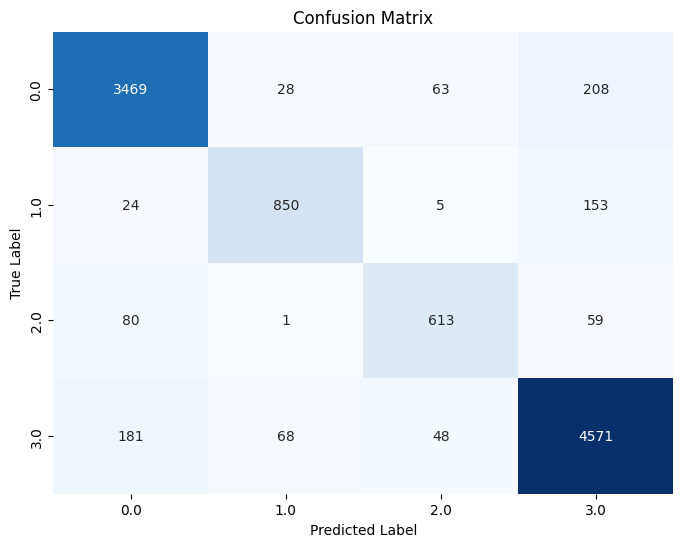

In [10]:
print("--- Classification Report ---")
report = classification_report(y_true, y_pred)
print(report)

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

Micro-averaged One-vs-Rest ROC AUC: 0.9887

Individual Class OvR ROC AUCs:
   Class 0 ROC AUC (OvR): 0.9864
   Class 1 ROC AUC (OvR): 0.9874
   Class 2 ROC AUC (OvR): 0.9859
   Class 3 ROC AUC (OvR): 0.9821

Macro-averaged One-vs-Rest ROC AUC: 0.9854

--- Plotting ROC Curves ---


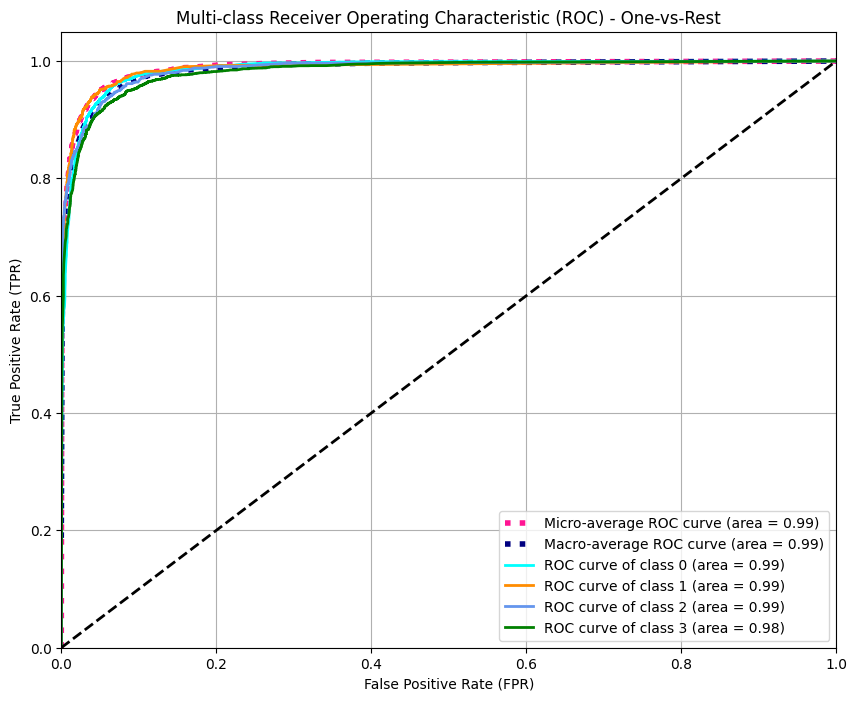

ROC curve plot displayed.


In [11]:
y_score = np.array([prob_1, prob_2, prob_3, prob_4]).T
n_classes = y_score.shape[1] # Dynamically determine number of classes from y_score columns
classes = np.arange(n_classes) # Assumes classes are 0, 1, ..., n_classes-1

# Binarize the true labels for One-vs-Rest calculation
# This converts y_true from a single column of labels to a one-hot encoded matrix
# where each column represents a class.
from sklearn.preprocessing import label_binarize # Use label_binarize for more robust handling
y_true_binarized = label_binarize(y_true, classes=classes)

# Handle the case where LabelBinarizer (or label_binarize) might return a single column for binary cases
# when n_classes is > 1 but effectively binary (e.g. classes=[0,1] within a 3-class setup)
# For OvR, we generally expect one column per class in y_true_binarized.
if y_true_binarized.shape[1] == 1 and n_classes > 1:
    # If y_true only contains two unique values from 'classes' (e.g. 0 and 2, but not 1)
    # label_binarize might still output more than 1 column if classes are specified correctly.
    # This specific check is more for a scenario where `classes` might have been [0,1]
    # and only one column was output by LabelBinarizer.
    # A more robust way is to ensure `label_binarize(y_true, classes=range(n_classes))`
    # If y_true only contains a subset of classes, `label_binarize` with `classes=classes`
    # should still produce `n_classes` columns.
    # This specific adjustment might be needed if `classes` was not exhaustively covering all potential labels up to n_classes-1
    # or if y_true was for a strictly binary problem initially.
    # For the general multiclass OvR based on y_score with n_classes columns,
    # y_true_binarized should also have n_classes columns.
    # If y_true_binarized.shape[1] != n_classes:
    #    print(f"Warning: y_true_binarized columns ({y_true_binarized.shape[1]}) != n_classes ({n_classes}). Adjusting.")
    #    # This might indicate an issue with how y_true or classes were defined.
    #    # Forcing it to n_classes (e.g. by re-binarizing with explicit all classes) might be needed.
    #    # However, the current code assumes `label_binarize(y_true, classes=classes)` works as intended.
    pass # Assuming label_binarize with `classes=classes` correctly gives n_classes columns.


# Calculate Micro-averaged One-vs-Rest ROC AUC
micro_roc_auc_ovr = roc_auc_score(y_true_binarized, y_score, multi_class="ovr", average="micro")
print(f"Micro-averaged One-vs-Rest ROC AUC: {micro_roc_auc_ovr:.4f}")

# You can also get individual class ROC AUCs (OvR)
# and macro-averaged ROC AUC for comparison.
print("\nIndividual Class OvR ROC AUCs:")
roc_auc_ovr_per_class = {}
for i, class_name in enumerate(classes):
    # Ensure y_true_binarized has enough columns
    if i < y_true_binarized.shape[1] and i < y_score.shape[1]:
        roc_auc_val = roc_auc_score(y_true_binarized[:, i], y_score[:, i])
        roc_auc_ovr_per_class[class_name] = roc_auc_val
        print(f"   Class {class_name} ROC AUC (OvR): {roc_auc_val:.4f}")
    else:
        # This case should ideally not happen if y_true_binarized and y_score are correctly formed
        print(f"   Class {class_name} ROC AUC (OvR): Data unavailable (y_true_binarized shape: {y_true_binarized.shape}, y_score shape: {y_score.shape}, index: {i})")
        roc_auc_ovr_per_class[class_name] = np.nan # Or other placeholder

macro_roc_auc_ovr = roc_auc_score(y_true_binarized, y_score, multi_class="ovr", average="macro")
print(f"\nMacro-averaged One-vs-Rest ROC AUC: {macro_roc_auc_ovr:.4f}")

# --- Plotting section ---
print("\n--- Plotting ROC Curves ---")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_val_for_plot = dict() # To store AUC values calculated from roc_curve for legend

for i in range(n_classes):
    if i < y_true_binarized.shape[1] and i < y_score.shape[1]:
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
        roc_auc_val_for_plot[i] = auc(fpr[i], tpr[i]) # Calculate area under curve for legend
    else:
        # Placeholder if data for a class is missing or inconsistent
        fpr[i], tpr[i], roc_auc_val_for_plot[i] = np.array([0,1]), np.array([0,1]), 0.0


# Compute micro-average ROC curve and ROC area
# .ravel() flattens the multi-dimensional arrays into one dimension
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_score.ravel())
roc_auc_val_for_plot["micro"] = auc(fpr["micro"], tpr["micro"]) # Should be same as micro_roc_auc_ovr

# Compute macro-average ROC curve and ROC area
# First, aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes) if i in fpr]))
# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
valid_classes_for_macro = 0
for i in range(n_classes):
    if i in fpr and i in tpr : # Ensure fpr, tpr for the class are computed
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        valid_classes_for_macro +=1

if valid_classes_for_macro > 0:
    mean_tpr /= valid_classes_for_macro # Divide by the number of classes actually contributing
else:
    mean_tpr = np.array([0,1]) # Default if no valid classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc_val_for_plot["macro"] = auc(fpr["macro"], tpr["macro"]) # Should be same as macro_roc_auc_ovr

# Plot all ROC curves
plt.figure(figsize=(10, 8)) # Set figure size for better readability

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc_val_for_plot["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc_val_for_plot["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']) # Add more colors if more classes
for i, color in zip(range(n_classes), colors):
    if i in roc_auc_val_for_plot: # Check if AUC for the class was computed
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {classes[i]} (area = {roc_auc_val_for_plot[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Plot the random chance line (diagonal)
plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits (slightly above 1.0 for better visibility of curves near top)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-class Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right") # Position the legend
plt.grid(True) # Add a grid for easier reading
# plt.savefig('multiclass_roc_curve_ovr.png') # Uncomment to save the figure
plt.show() # Display the plot

print("ROC curve plot displayed.")